# Task 2

Implement a random Metropolis-Hastings MCMC algorithm, based on the true likelihood (as computed by the exact method proposed by the author), to estimate the parameters of the model for the data mentioned in the paper.

In [11]:
import sys
import os

current_dir = os.getcwd()
project_root = os.path.dirname(current_dir)

if project_root not in sys.path:
    sys.path.append(project_root)

print(f"Racine ajoutée : {project_root}")
print(f"Dossier 'src' détecté ? : {os.path.isdir(os.path.join(project_root, 'src'))}")

Racine ajoutée : /home/onyxia/work/Non-Gaussian-State-Space-Models
Dossier 'src' détecté ? : True


In [12]:
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
from scipy.special import gammaln
from scipy.stats import poisson, nbinom
from tqdm import tqdm
import openpyxl
from numba import njit
from scipy import stats
import math 
import particles
import particles.state_space_models as ssm
import particles.distributions as dists


# local files
import src.cox_simulation as cx
import utils.plots as pl
import src.creal_filter as cf 
import src.particle_filter as pf
import src.metropolis as mt
import utils.load_data as ld

 Load: Serie_1 (Beta: None)


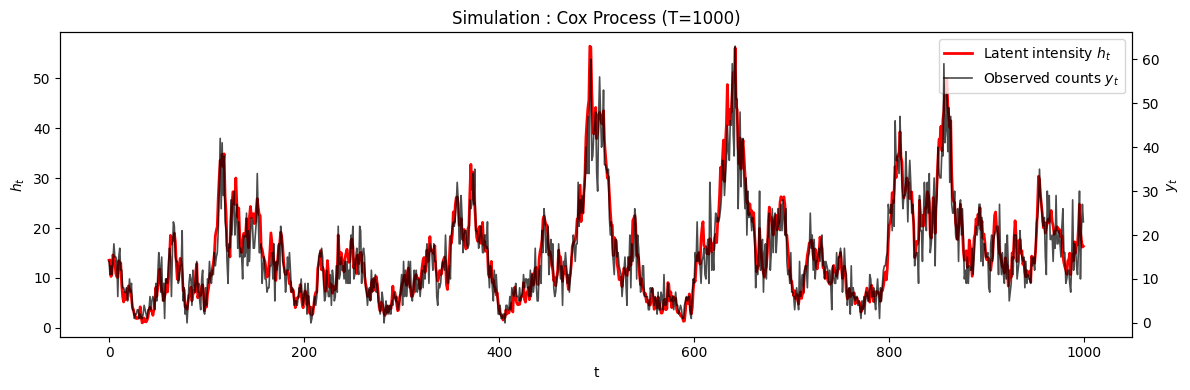

In [13]:
# {"phi": 0.965, "nu": 2.5, "c": 0.2} sans covariates
excel_path = os.path.join(project_root, "data", "data_groupe_T1000.xlsx")
y1, X1, h1, beta1, p1 = ld.load_data(excel_path, "Serie_1")
pl.plot_overlay_clean(y1, h1, T_show=1000, start=0)

 Load: Serie_2 (Beta: [-0.5  0.3])


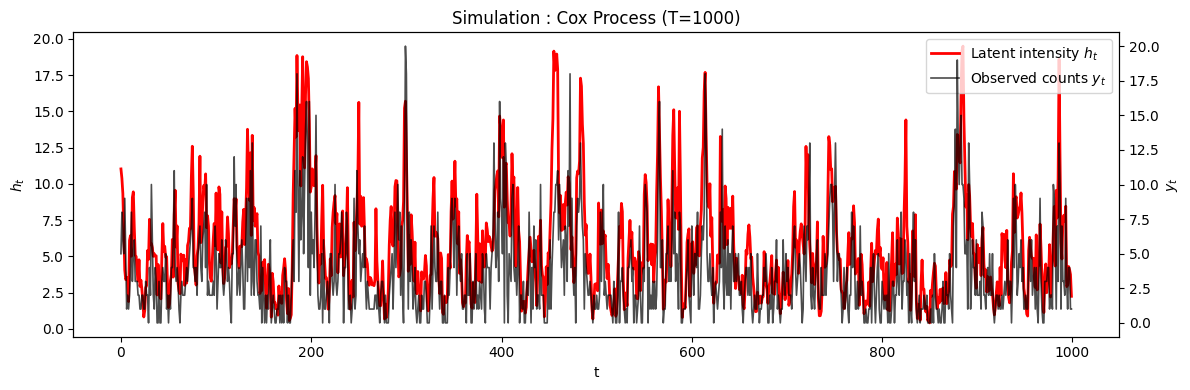

In [14]:
# {"phi": 0.8, "nu": 3, "c": 0.4} avec covariates; beta1 = np.array([-0.5, 0.3])
y2, X2, h2, beta2, p2 = ld.load_data(excel_path, "Serie_2")
pl.plot_overlay_clean(y2, h2, T_show=1000, start=0)


 Load: Serie_3 (Beta: [-0.5  0.4 -0.3])


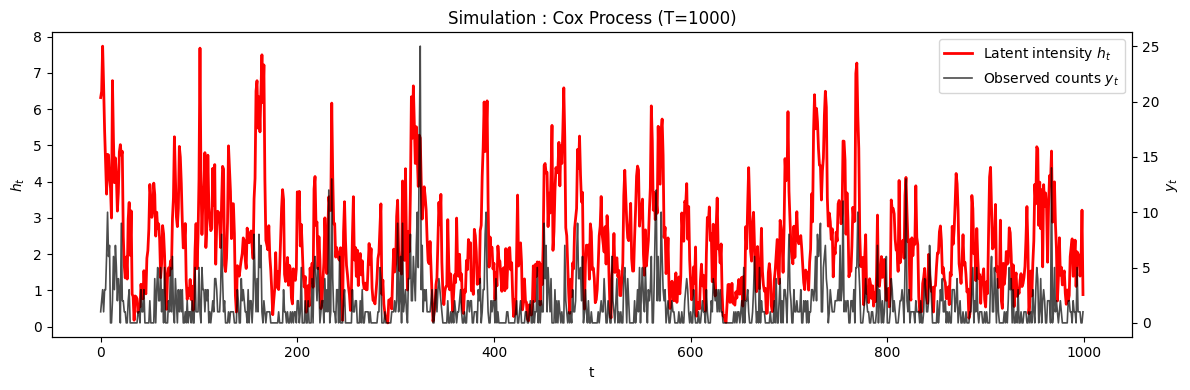

In [5]:
# params_3 = {"phi": 0.8, "nu": 2.5, "c": 0.2} beta2 = np.array([-0.5, 0.4, -0.3])
y3, X3, h3, beta3, p3 = ld.load_data(excel_path, "Serie_3")
pl.plot_overlay_clean(y3, h3, T_show=1000, start=0)


In [6]:
# Exact filter truncation
Z_TRUNC = 150
exact1 = cf.ExactFilter(y1, Z_trunc=Z_TRUNC)

In [ ]:
# MCMC 1 chaîne
#0.965, "nu": 2.5, "c": 0.2
#chain_results = mt.run_metropolis_exact(
#    y1, 
#    exact1, 
#    n_iterations=2500, 
#    initial_theta=[0.8, 2.5, 0.5], # phi, nu, c
#    proposal_std=[0.008, 0.07, 0.03] # Petits pas pour commencer
#)

 Launching 10 MCMC chains in parallel on CPU...


Progression globale: 100%|██████████| 10/10 [00:00<00:00, 3381.69it/s]



      DETAILS OF ACCEPTANCE RATES
Overall average : 53.12%

Chains 01 : 54.44%  ->  Acceptable
Chains 02 : 52.56%  ->  Acceptable
Chains 03 : 53.60%  ->  Acceptable
Chains 04 : 54.36%  ->  Acceptable
Chains 05 : 53.56%  ->  Acceptable
Chains 06 : 51.12%  ->  Acceptable
Chains 07 : 53.40%  ->  Acceptable
Chains 08 : 52.88%  ->  Acceptable
Chains 09 : 52.84%  ->  Acceptable
Chains 10 : 52.48%  ->  Acceptable

 Generation Figure 1: Traceplots...


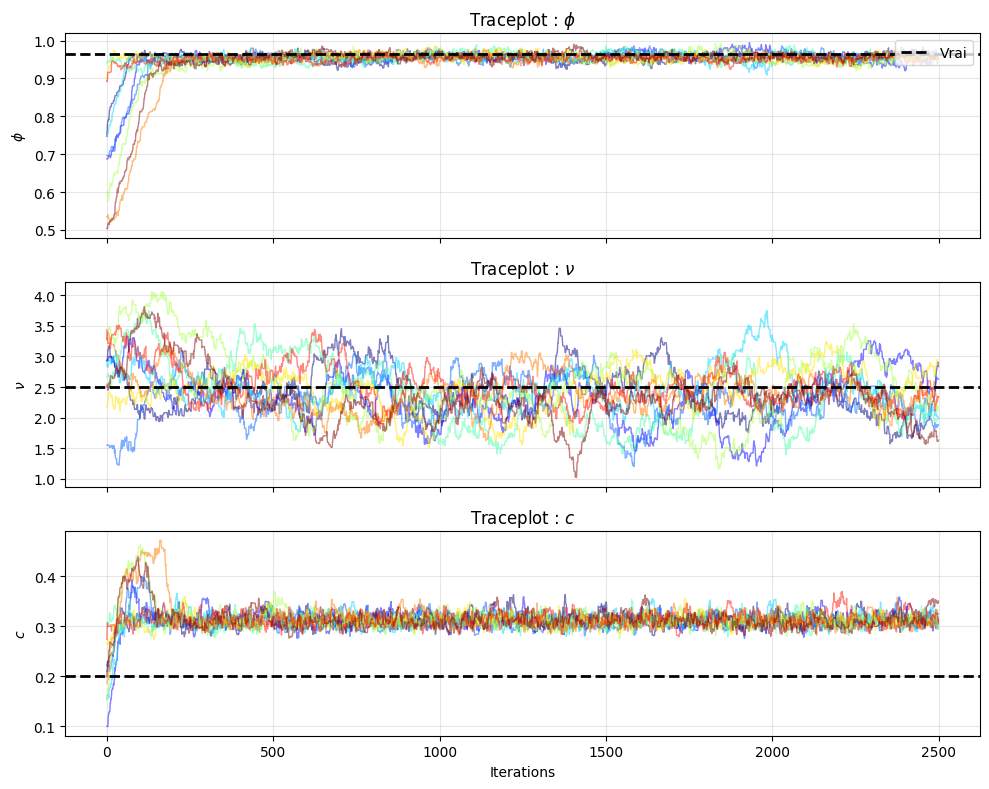


 Generation Figure 2: Histograms of Estimators...


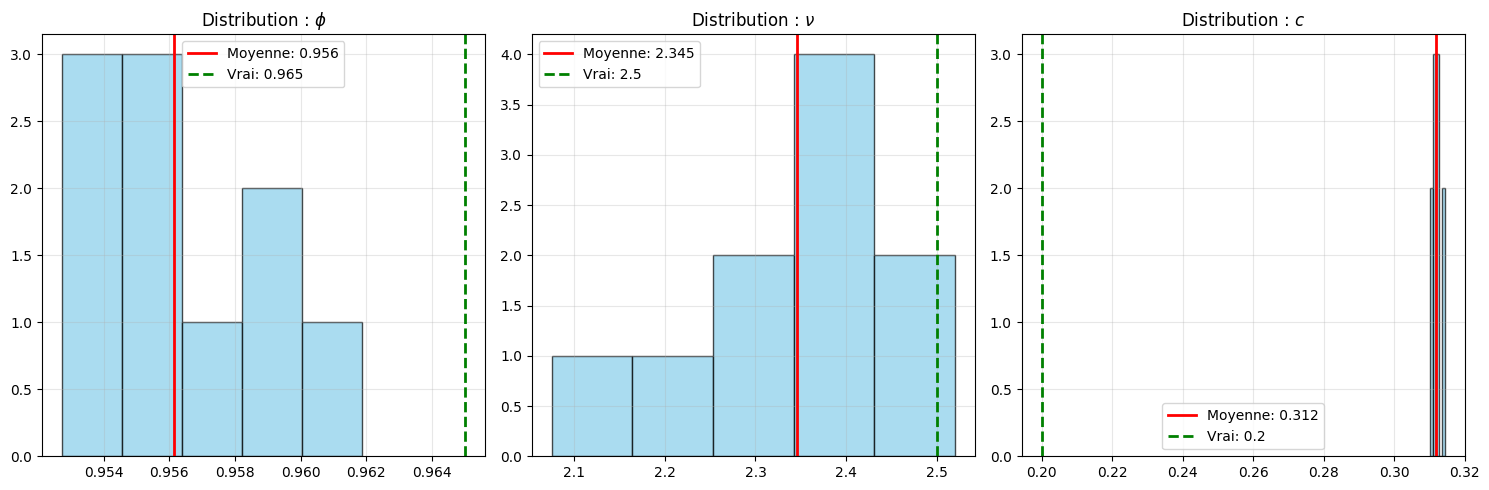


--- FINAL RESULTS (Aggregate) ---
Phi : 0.9561 +/- 0.0106
Nu  : 2.3454 +/- 0.3918
c   : 0.3120 +/- 0.0127


In [ ]:
# Plusieurs chaines
#0.965, "nu": 2.5, "c": 0.2
res = mt.run_multi_chain_mcmc(y1, exact1, n_chains=10, n_iter=2500, true_params=[0.965, 2.5, 0.2], proposal_std=[0.008, 0.07, 0.01],burn_in=1000)

In [ ]:
#0.965, "nu": 2.5, "c": 0.2
true_vals = [0.965, 2.5, 0.2]
names = [r'$\phi$', r'$\nu$', r'$c$']
pl.plot_mcmc_diagnostics(res, true_params=true_vals, param_names=names, burn_in=500)

NameError: name 'res' is not defined

 Launching 10 MCMC chains in parallel on CPU...


Progression globale: 100%|██████████| 10/10 [00:00<00:00, 4218.77it/s]



      DETAILS OF ACCEPTANCE RATES
Overall average : 38.80%

Chains 01 : 40.48%  ->  Optimal
Chains 02 : 40.12%  ->  Optimal
Chains 03 : 38.64%  ->  Optimal
Chains 04 : 36.96%  ->  Optimal
Chains 05 : 38.96%  ->  Optimal
Chains 06 : 37.16%  ->  Optimal
Chains 07 : 39.24%  ->  Optimal
Chains 08 : 39.72%  ->  Optimal
Chains 09 : 37.56%  ->  Optimal
Chains 10 : 39.12%  ->  Optimal

 Generation Figure 1: Traceplots...


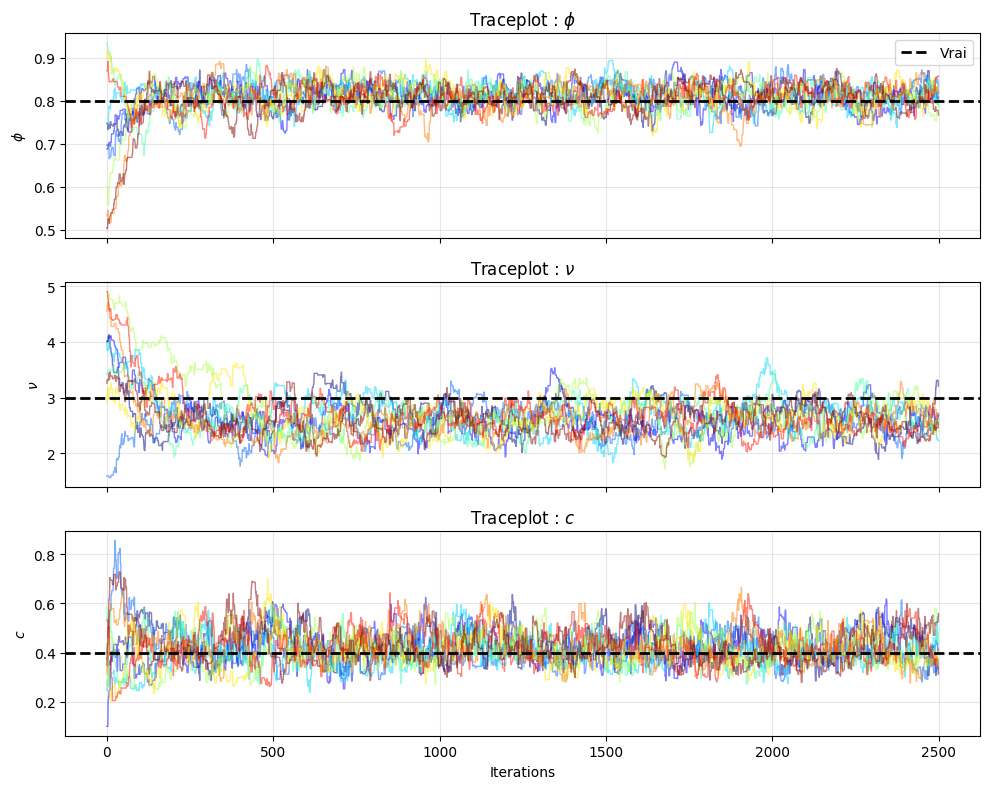


 Generation Figure 2: Histograms of Estimators...


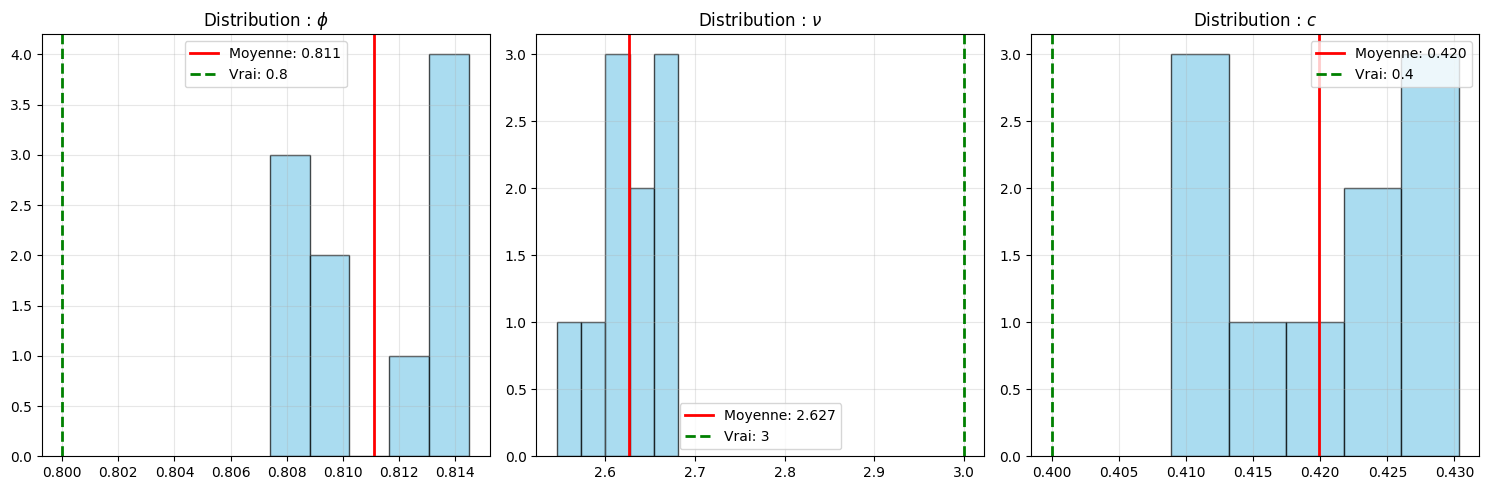


--- FINAL RESULTS (Aggregate) ---
Phi : 0.8111 +/- 0.0267
Nu  : 2.6269 +/- 0.2707
c   : 0.4199 +/- 0.0613


In [15]:
# {"phi": 0.8, "nu": 3, "c": 0.4} avec covariates; beta1 = np.array([-0.5, 0.3])
exact2 = cf.ExactFilter(y2, Z_trunc=100)
res2 = mt.run_multi_chain_mcmc(y2, exact2,X=X2,beta=beta2, n_chains=10, n_iter=2500, true_params=[0.8, 3, 0.4], proposal_std=[0.015, 0.1, 0.05],burn_in=1000)

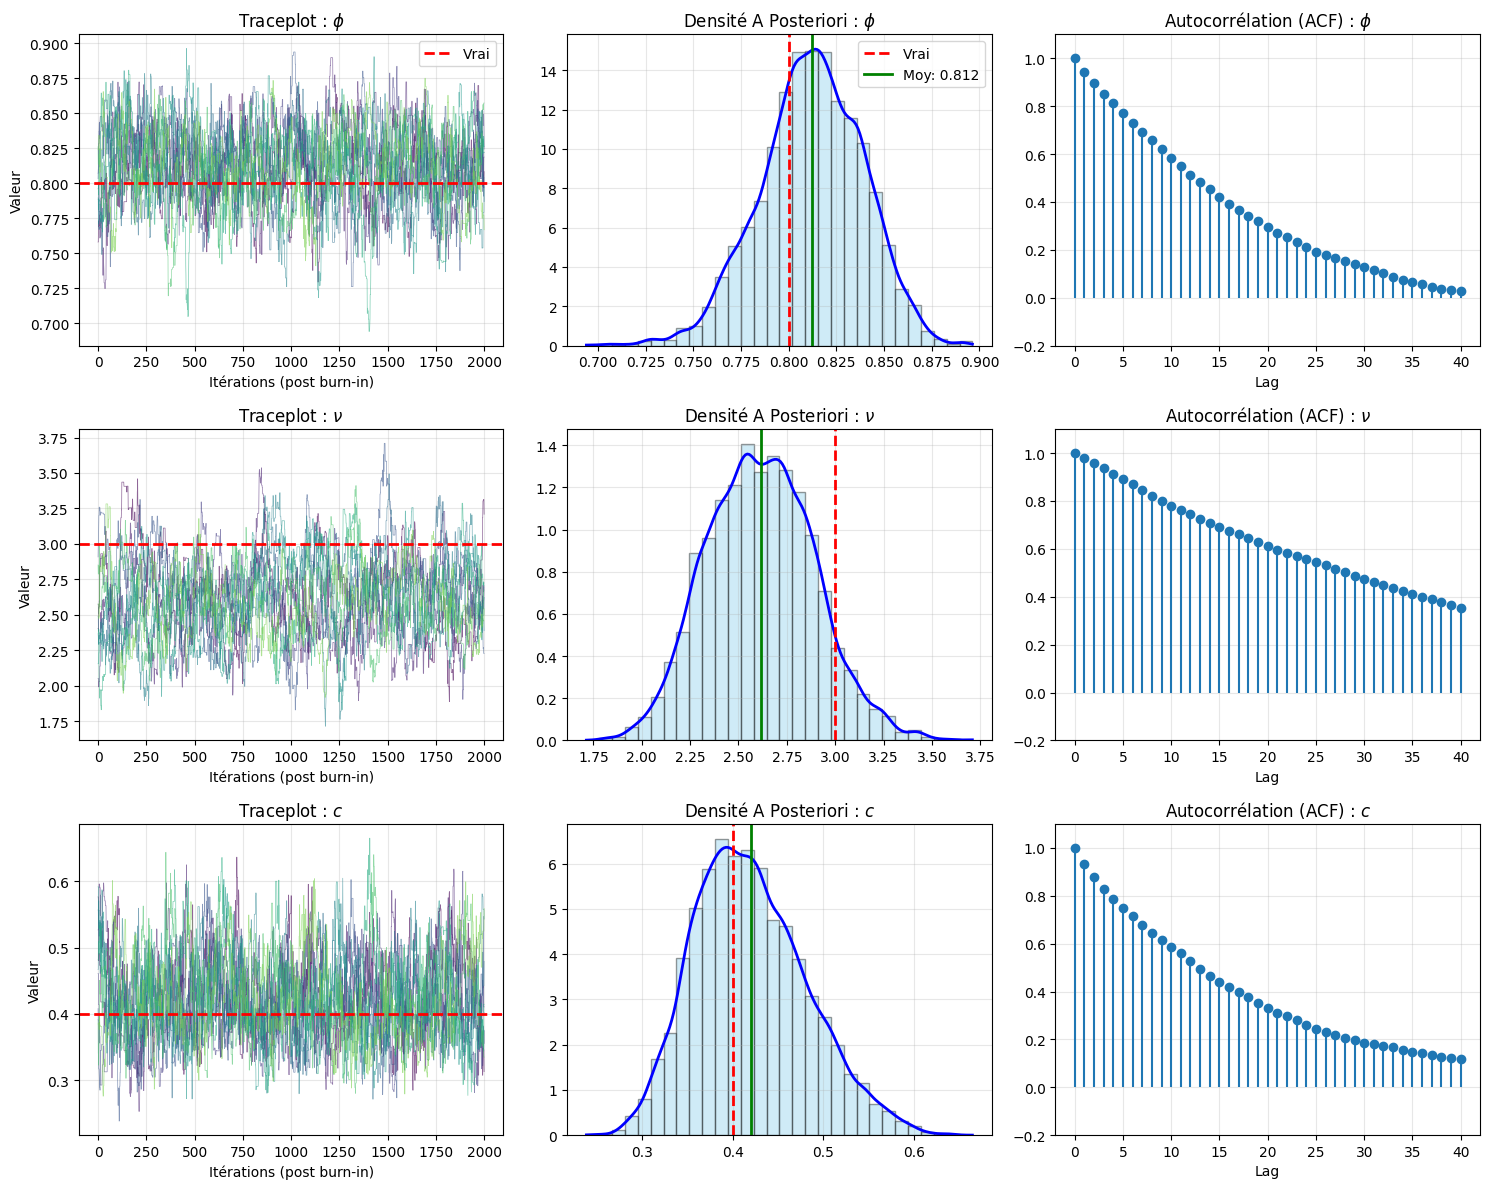

In [16]:
# et que les vrais paramètres sont phi=0.8, nu=3, c=0.4
true_vals = [0.8, 3.0, 0.4]
names = [r'$\phi$', r'$\nu$', r'$c$']
pl.plot_mcmc_diagnostics(res2, true_params=true_vals, param_names=names, burn_in=500)

 Launching 10 MCMC chains in parallel on CPU...


Progression globale: 100%|██████████| 10/10 [00:00<00:00, 2492.16it/s]



      DETAILS OF ACCEPTANCE RATES
Overall average : 28.64%

Chains 01 : 28.68%  ->  Optimal
Chains 02 : 28.20%  ->  Optimal
Chains 03 : 28.36%  ->  Optimal
Chains 04 : 28.16%  ->  Optimal
Chains 05 : 25.04%  ->  Optimal
Chains 06 : 29.56%  ->  Optimal
Chains 07 : 28.44%  ->  Optimal
Chains 08 : 31.36%  ->  Optimal
Chains 09 : 28.08%  ->  Optimal
Chains 10 : 30.56%  ->  Optimal

 Generation Figure 1: Traceplots...


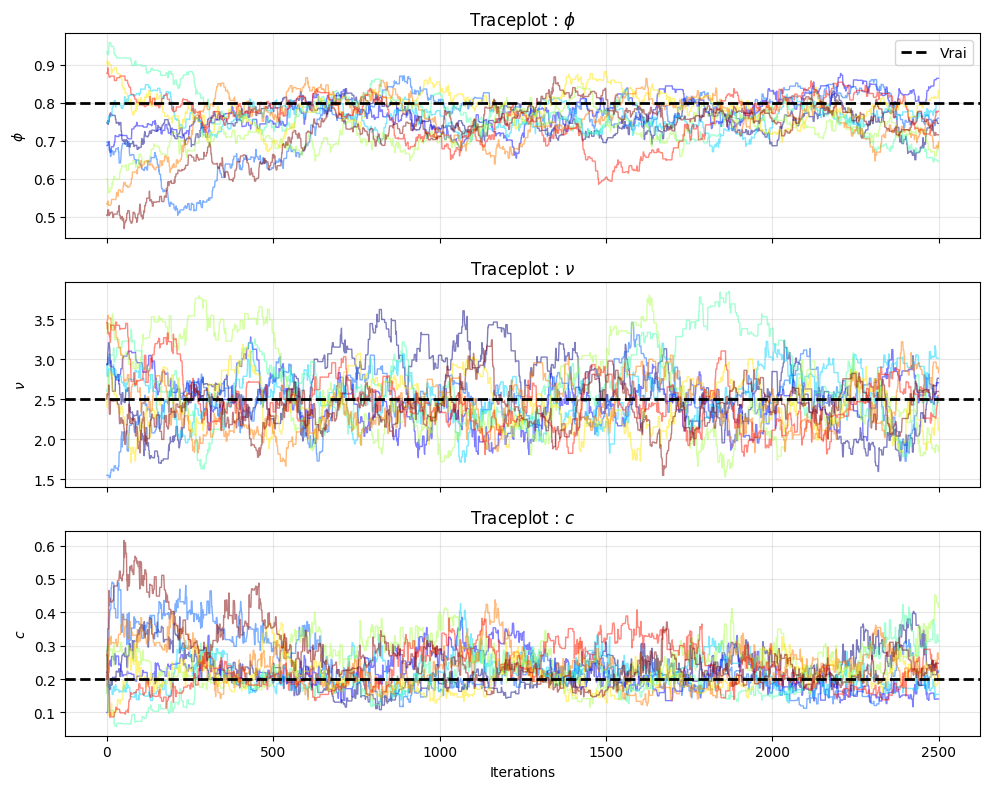


 Generation Figure 2: Histograms of Estimators...


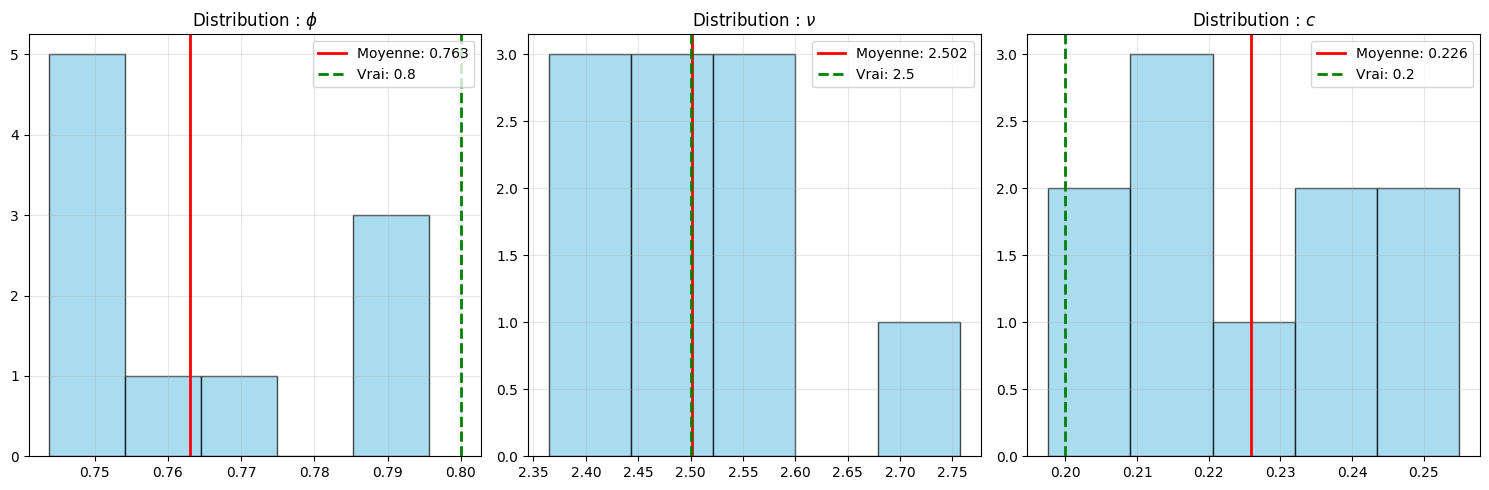


--- FINAL RESULTS (Aggregate) ---
Phi : 0.7630 +/- 0.0458
Nu  : 2.5018 +/- 0.3697
c   : 0.2259 +/- 0.0550


In [ ]:
# params_3 = {"phi": 0.8, "nu": 2.5, "c": 0.2} beta2 = np.array([-0.5, 0.4, -0.3])
exact3 = cf.ExactFilter(y3, Z_trunc=100)
res3 = mt.run_multi_chain_mcmc(y3, exact3,X=X3,beta=beta3, n_chains=10, n_iter=2500, true_params=[0.8, 2.5, 0.2], proposal_std=[0.01, 0.1, 0.05],burn_in=1000)

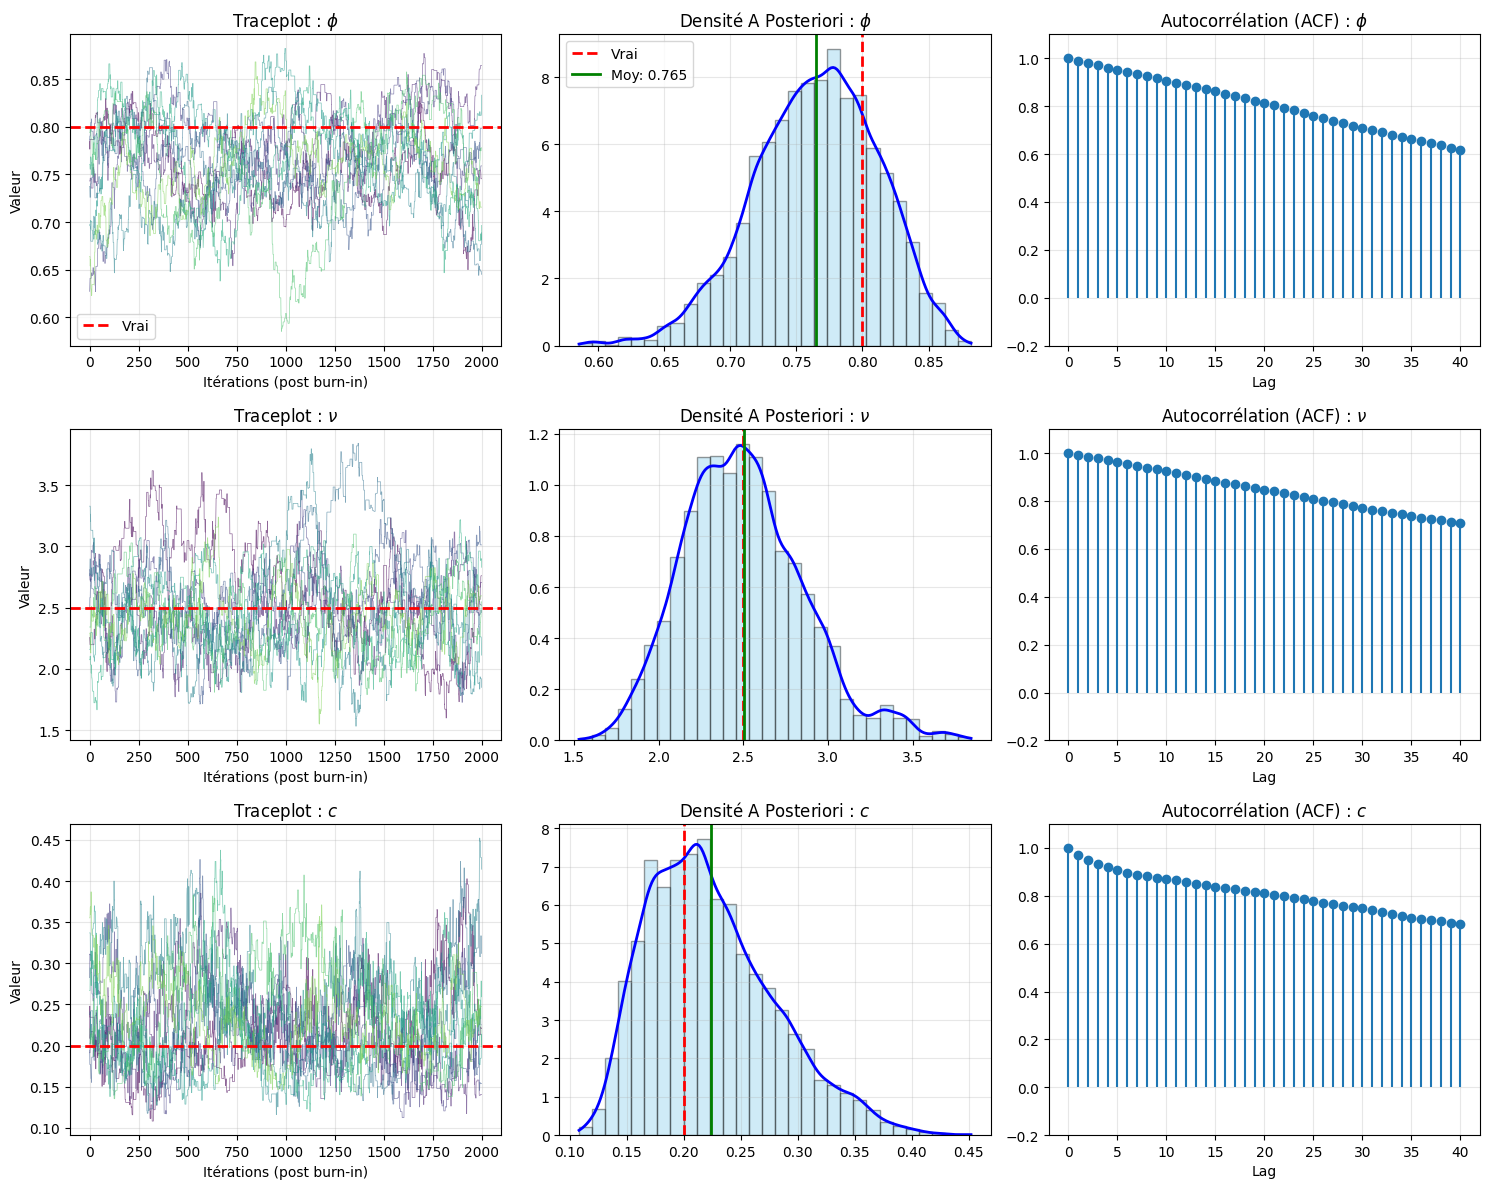

In [ ]:
true_vals = [0.8, 2.5, 0.2]
names = [r'$\phi$', r'$\nu$', r'$c$']
plot_mcmc_diagnostics(res3, true_params=true_vals, param_names=names, burn_in=500)